
### demonstration of k-means clustering with iris dataset

/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x745a1e018c10>
Traceback (most r

Text(0.5, 1.0, 'Original Data')

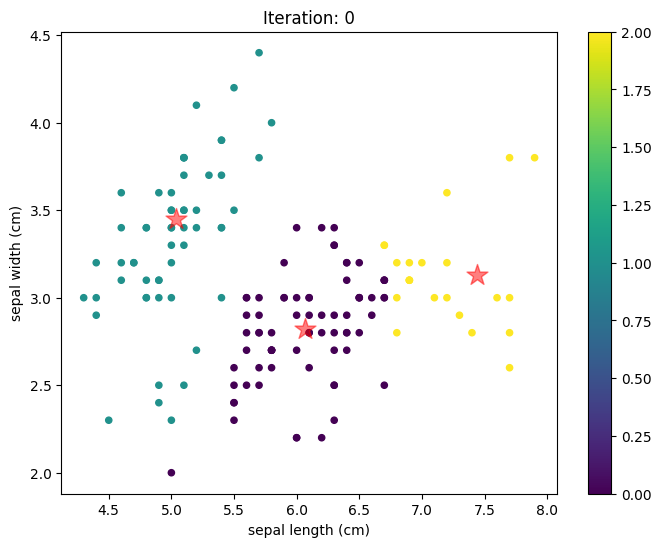

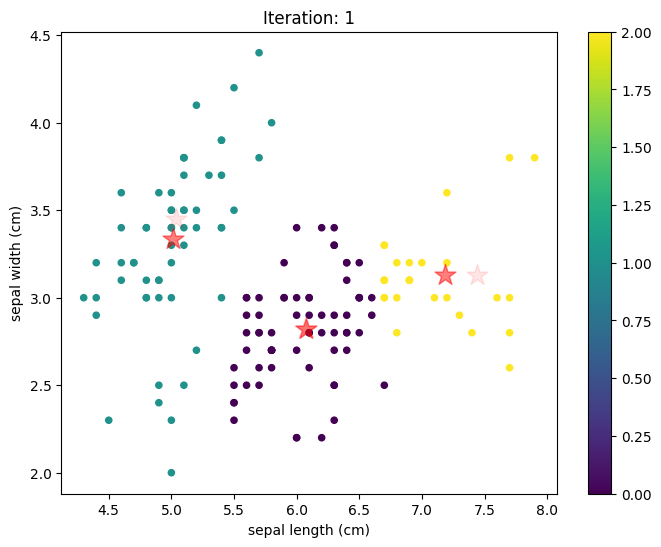

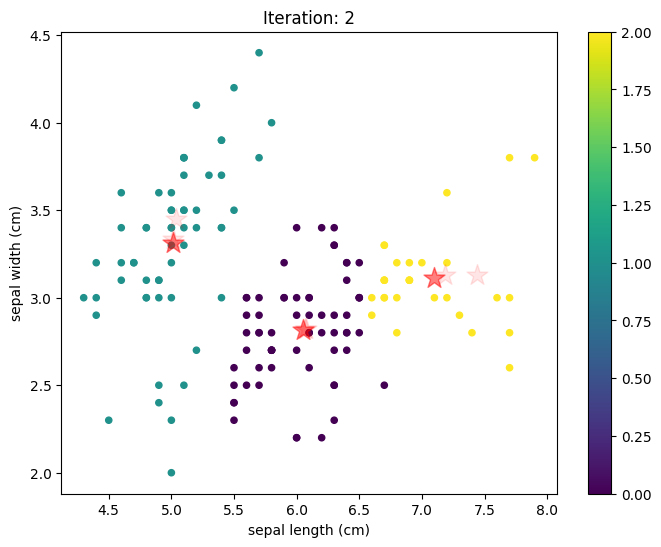

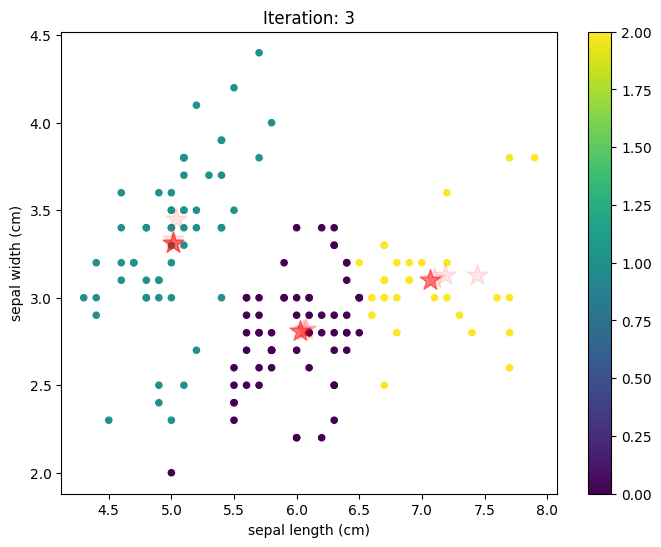

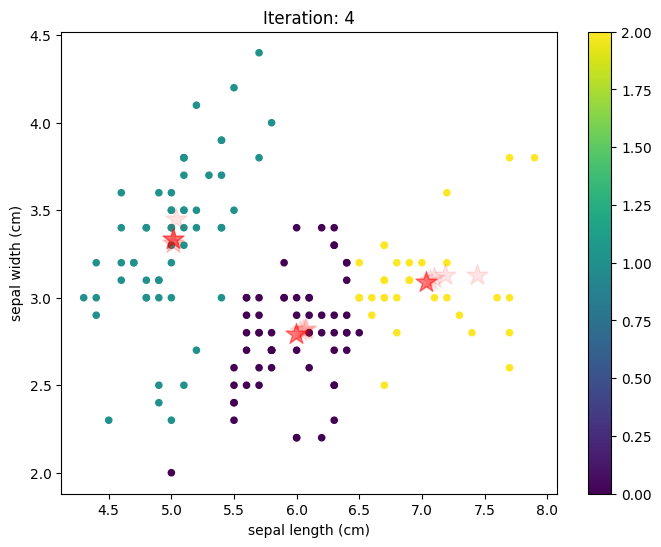

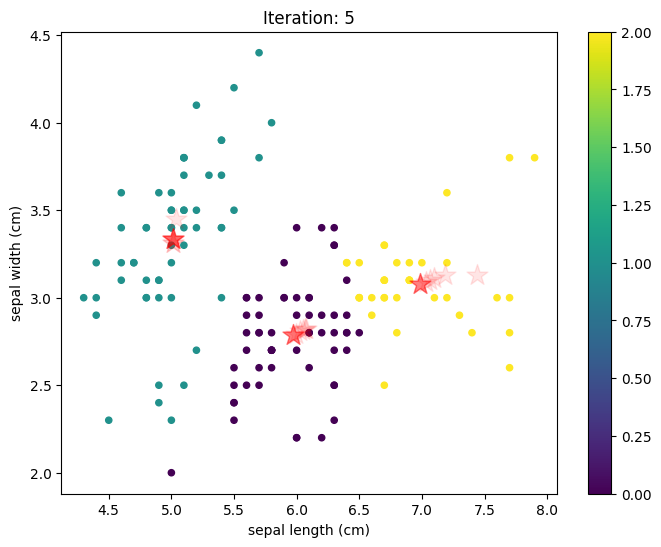

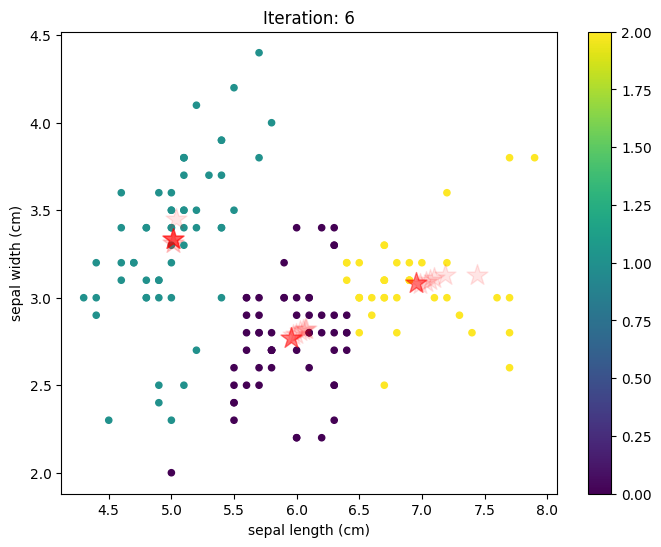

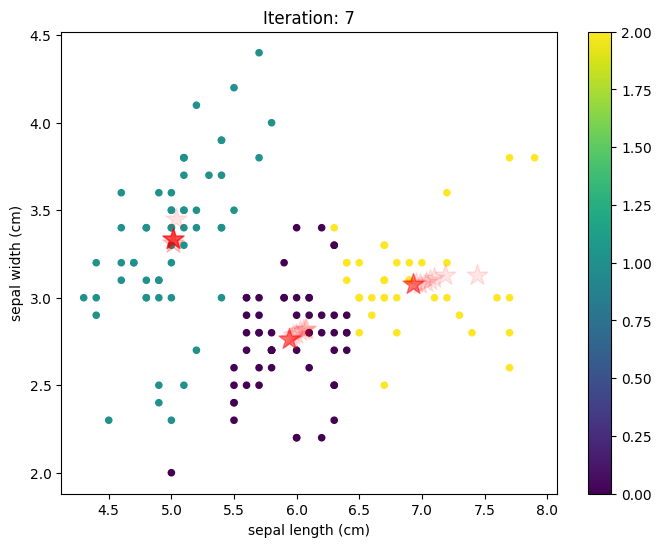

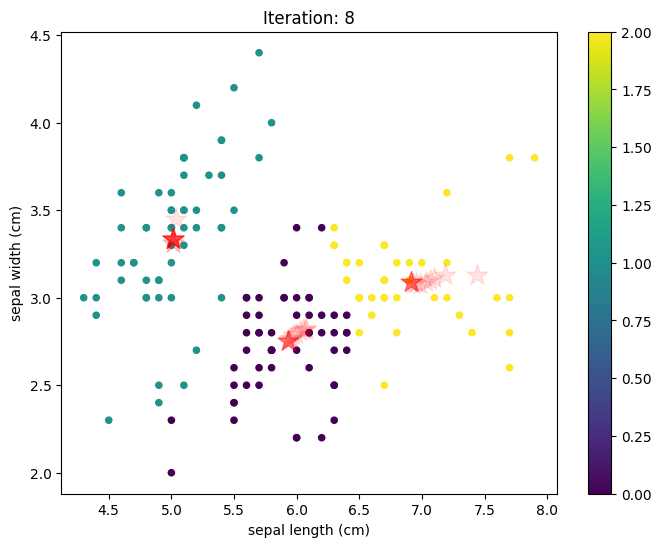

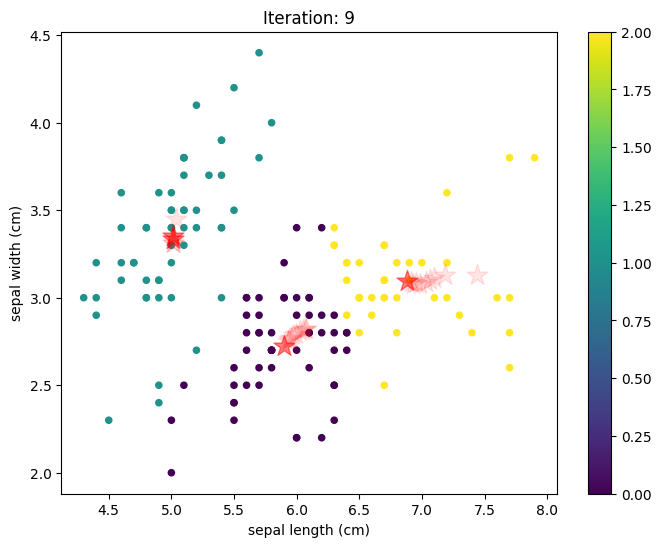

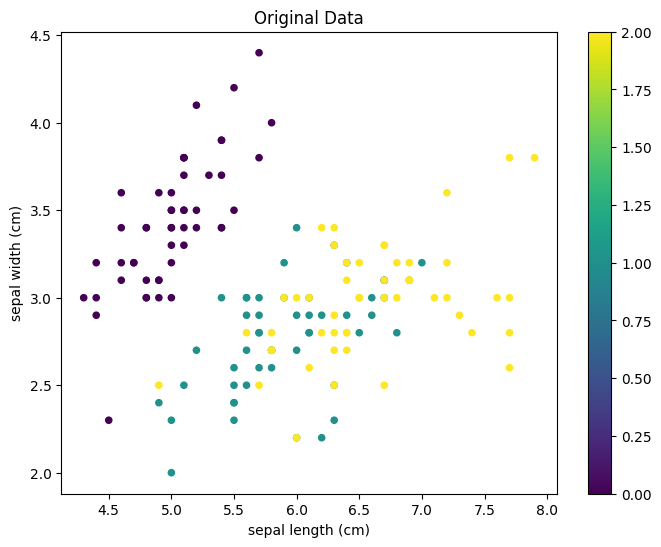

In [2]:
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_iris(as_frame=True)

X = (dataset
     ['data']
     .loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
y = dataset['target']

# keep list of all centroids
centroids = []


for i in range(10):
    model = KMeans(n_clusters=3, init='random', n_init=1,
                    max_iter=i+1, random_state=42)
    model.fit(X)
    label = model.predict(X)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=label, cmap='viridis', ax=ax)
    
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=250, color='r', alpha=.5)
    ax.set_title('Iteration: ' + str(i))

    if i > 0:
        for centroid in centroids:
            ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=250, color='r', alpha=.1)
    
    centroids.append(model.cluster_centers_)
    
  
fig, ax = plt.subplots(figsize=(8, 6))
X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=y, cmap='viridis', ax=ax)
ax.set_title('Original Data')


### K Evaluation for K-means


## Elbow method 
Track the "inertia" of the model as the K value increases. The inertia is the sum of squared distances of samples to their closest cluster center.

/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x745a1788db40>
Traceback (most r

Text(0.5, 1.0, 'Elbow Method')

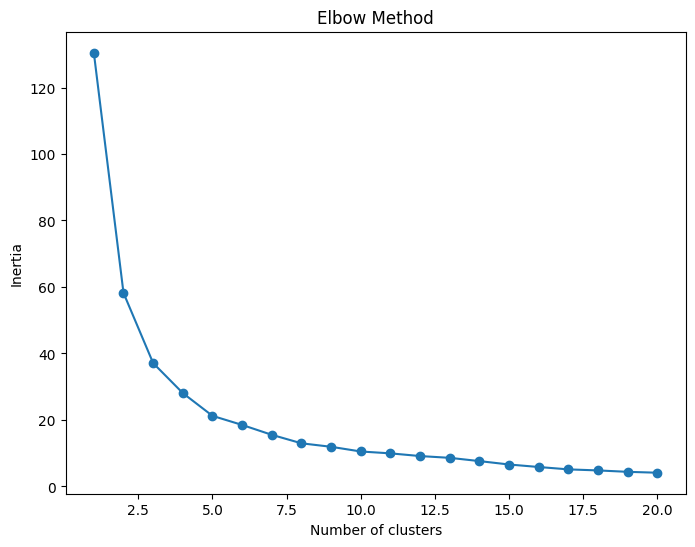

In [3]:
# Running  elbow method to find optimal number of clusters

inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto',
                max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method')
